In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

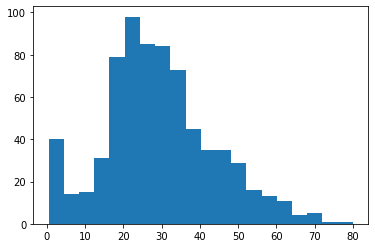

In [4]:
plt.hist(df['age'],bins=20)

<AxesSubplot:xlabel='age', ylabel='Count'>

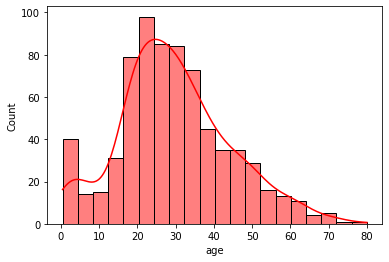

In [5]:
sns.histplot(df['age'],kde=True,palette='pastel',color='red')

<AxesSubplot:xlabel='age', ylabel='Count'>

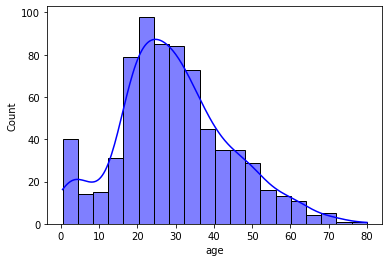

In [6]:
sns.histplot(df['age'][df['age'].isna() == False],kde=True,color='blue')

In [7]:
var = df['age'][df['age'].isna() == False]

In [8]:
var

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

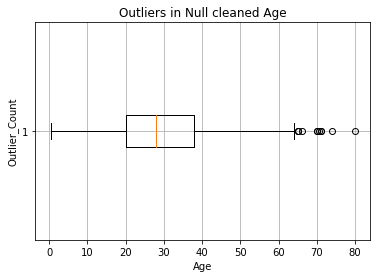

In [9]:
plt.boxplot(var,vert=False)
plt.ylabel('Outlier_Count')
plt.xlabel('Age')
plt.title('Outliers in Null cleaned Age')
plt.grid(b=True)

In [11]:
var_mean = np.mean(var)
var_std = np.std(var)

In [12]:
print(var_mean)
print(var_std)

29.69911764705882
14.516321150817317


In [13]:
z_score = stats.zscore(var)
print(z_score)

[-0.53037664  0.57183099 -0.25482473  0.36516706  0.36516706  1.67403863
 -1.90813618 -0.18593675 -1.08148046 -1.77036023  1.94959054 -0.6681526
  0.64071897 -1.08148046  1.74292661 -1.90813618  0.08961515  0.36516706
  0.29627909 -1.01259248 -0.11704878 -1.49480832  0.57183099 -0.73704057
  0.70960695  2.50069435 -0.11704878  0.8473829  -0.59926462 -0.80592855
 -1.08148046  0.70960695 -0.18593675 -1.83924821 -0.73704057 -0.80592855
 -1.5636963  -0.59926462  1.32959874 -0.0481608   2.43180638 -0.59926462
 -0.08260479 -1.70147225 -1.28814439 -0.53037664  0.57183099  1.05404683
 -1.77036023 -0.0481608  -0.73704057 -0.87481653 -0.25482473  0.15850313
 -0.9437045  -0.59926462 -0.25482473  0.15850313 -0.32371271 -1.98873512
  0.02072718 -0.53037664 -0.0481608  -0.11704878 -0.87481653  0.22739111
 -0.9437045  -0.46148866 -0.39260069 -0.0481608  -0.6681526   1.12293481
 -0.25482473  2.01847851  2.84513424 -0.46148866  0.29627909  0.29627909
 -0.11704878 -0.59926462  0.22739111  0.50294302 -0.

In [21]:
z_score = list(z_score)

In [24]:
var = list(var)

In [31]:
y = zip(var,z_score)

In [34]:
y = tuple(y)

In [40]:
pd.DataFrame(y,columns=['Age','Z'])

,Age,Z
0,22.0,-0.530377
1,38.0,0.571831
2,26.0,-0.254825
3,35.0,0.365167
4,35.0,0.365167
...,...,...
709,39.0,0.640719
710,27.0,-0.185937
711,19.0,-0.737041
712,26.0,-0.254825


In [79]:
threshold = [a for a in range(-3,4)]
for i,j in zip(var,z_score):
    if j not in threshold:
        
        print(j)

-0.5303766406838785
0.571830994003175
-0.25482473201211503
0.36516706249935255
0.36516706249935255
1.6740386286902287
-1.9081361840426954
-0.1859367548441742
-1.0814804580274051
-1.7703602297068137
1.949590537361992
-0.6681525950197601
0.6407189711711159
-1.0814804580274051
1.7429266058581694
-1.9081361840426954
0.08961515382758917
0.36516706249935255
0.2962790853314117
-1.0125924808594644
-0.11704877767623337
-1.4948083210350502
0.571830994003175
-0.7370405721877009
0.7096069483390568
2.500694354705519
-0.11704877767623337
0.8473829026749384
-0.5992646178518193
-0.8059285493556418
-1.0814804580274051
0.7096069483390568
-0.1859367548441742
-1.8392482068747544
-0.7370405721877009
-0.8059285493556418
-1.5636962982029912
-0.5992646178518193
1.3295987428505243
-0.04816080050829252
2.431806377537578
-0.5992646178518193
-0.08260478909226295
-1.7014722525388728
-1.2881443895312277
-0.5303766406838785
0.571830994003175
1.054046834178761
-1.7703602297068137
-0.04816080050829252
-0.7370405721877

In [74]:
max(z_score)

3.4651260350566906